**CA-03 Decision Tree Algorithm**

---


**Tin Nguyen**

1. Data Source and Contents

 - Access data from the drive, and import all the necessary packages.

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [311]:
census_df = pd.read_csv('/content/drive/MyDrive/MSBA_Colab_2020/ML_Algorithms/Decision_Tree/census_data.csv')

2. Data Quality Analysis (DQA)

- Checking dataset and null values

In [312]:
census_df.head()

hours_per_week_bin occupation_bin  msr_bin  ...            age_bin   flag  y
0           b. 31-40   b. Mid - Low   b. Mid  ...   d. 36-40 & 56-60  train  0
1            a. 0-30        e. High  c. High  ...           e. 40-55  train  0
2           b. 31-40         a. Low   b. Mid  ...   d. 36-40 & 56-60  train  0
3           b. 31-40         a. Low  c. High  ...           e. 40-55  train  0
4           b. 31-40        e. High  c. High  ...  b. 26-30 & 71-100  train  0

[5 rows x 11 columns]

In [313]:
census_df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [314]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


3. Exploratory Data Analysis (EDA)

- Codes for the graphs of each independent value versus the dependent value

In [315]:
a1 = census_df[census_df.y ==1].groupby('age_bin')[['y']].count()
a1.reset_index(inplace=True)
b1 = census_df[census_df.y ==0].groupby('age_bin')[['y']].count()
b1.reset_index(inplace=True)
c1= census_df.groupby('age_bin')[['y']].count()
c1.reset_index(inplace=True)
d1 = pd.merge(a1,b1,on='age_bin',how='left')
e1 = pd.merge(d1,c1,on='age_bin',how='left')
e1.rename(columns={'y_x': '>50k', 'y_y': '<=50k', 'y': 'total'}, inplace = True)
e1['>50k_percent'] = (e1['>50k']/e1.total)*100
e1['<=50k_percent'] = (e1['<=50k']/e1.total)*100
e1 = e1.round(0)
e1=e1[['age_bin','<=50k_percent','>50k_percent']]
e1.set_index('age_bin', inplace = True)

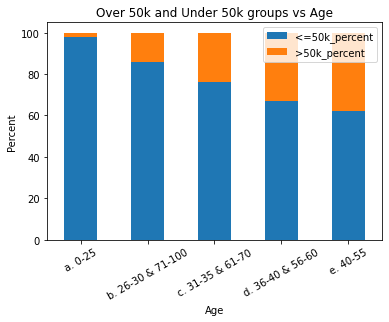

In [316]:
e1.plot(kind="bar", stacked=True)
plt.title('Over 50k and Under 50k groups vs Age')
plt.xlabel('Age')
plt.ylabel('Percent')
plt.xticks(rotation =30)
plt.legend(loc='best')
plt.show()

In [317]:
a2 = census_df[census_df.y ==1].groupby('capital_gl_bin')[['y']].count()
a2.reset_index(inplace=True)
b2 = census_df[census_df.y ==0].groupby('capital_gl_bin')[['y']].count()
b2.reset_index(inplace=True)
c2= census_df.groupby('capital_gl_bin')[['y']].count()
c2.reset_index(inplace=True)
d2 = pd.merge(a2,b2,on='capital_gl_bin',how='left')
e2 = pd.merge(d2,c2,on='capital_gl_bin',how='left')
e2.rename(columns={'y_x': '>50k', 'y_y': '<=50k', 'y': 'total'}, inplace = True)
e2['>50k_percent'] = (e2['>50k']/e2.total)*100
e2['<=50k_percent'] = (e2['<=50k']/e2.total)*100
e2 = e2.round(0)
e2=e2[['capital_gl_bin','<=50k_percent','>50k_percent']]
e2.set_index('capital_gl_bin', inplace = True)

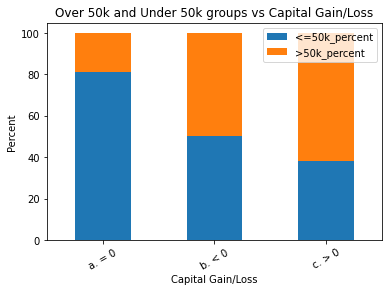

In [318]:
e2.plot(kind="bar", stacked=True)
plt.title('Over 50k and Under 50k groups vs Capital Gain/Loss')
plt.xlabel('Capital Gain/Loss')
plt.ylabel('Percent')
plt.xticks(rotation =30)
plt.legend(loc='best')
plt.show()

In [319]:
a3 = census_df[census_df.y ==1].groupby('education_bin')[['y']].count()
a3.reset_index(inplace=True)
b3 = census_df[census_df.y ==0].groupby('education_bin')[['y']].count()
b3.reset_index(inplace=True)
c3= census_df.groupby('education_bin')[['y']].count()
c3.reset_index(inplace=True)
d3 = pd.merge(a3,b3,on='education_bin',how='left')
e3 = pd.merge(d3,c3,on='education_bin',how='left')
e3.rename(columns={'y_x': '>50k', 'y_y': '<=50k', 'y': 'total'}, inplace = True)
e3['>50k_percent'] = (e3['>50k']/e3.total)*100
e3['<=50k_percent'] = (e3['<=50k']/e3.total)*100
e3 = e3.round(0)
e3=e3[['education_bin','<=50k_percent','>50k_percent']]
e3.set_index('education_bin', inplace = True)

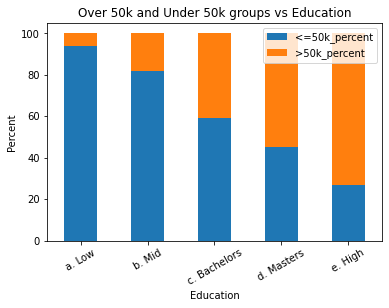

In [320]:
e3.plot(kind="bar", stacked=True)
plt.title('Over 50k and Under 50k groups vs Education')
plt.xlabel('Education')
plt.ylabel('Percent')
plt.xticks(rotation =30)
plt.legend(loc='best')
plt.show()

In [321]:
a4 = census_df[census_df.y ==1].groupby('hours_per_week_bin')[['y']].count()
a4.reset_index(inplace=True)
b4 = census_df[census_df.y ==0].groupby('hours_per_week_bin')[['y']].count()
b4.reset_index(inplace=True)
c4= census_df.groupby('hours_per_week_bin')[['y']].count()
c4.reset_index(inplace=True)
d4 = pd.merge(a4,b4,on='hours_per_week_bin',how='left')
e4 = pd.merge(d4,c4,on='hours_per_week_bin',how='left')
e4.rename(columns={'y_x': '>50k', 'y_y': '<=50k', 'y': 'total'}, inplace = True)
e4['>50k_percent'] = (e4['>50k']/e4.total)*100
e4['<=50k_percent'] = (e4['<=50k']/e4.total)*100
e4 = e4.round(0)
e4=e4[['hours_per_week_bin','<=50k_percent','>50k_percent']]
e4.set_index('hours_per_week_bin', inplace = True)

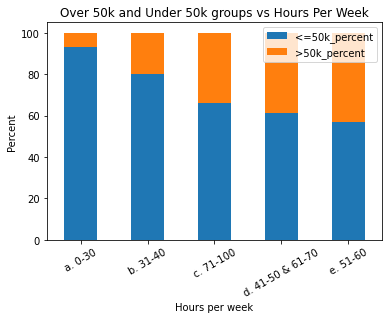

In [322]:
e4.plot(kind="bar", stacked=True)
plt.title('Over 50k and Under 50k groups vs Hours Per Week')
plt.xlabel('Hours per week')
plt.ylabel('Percent')
plt.xticks(rotation =30)
plt.legend(loc='best')
plt.show()

In [323]:
a5 = census_df[census_df.y ==1].groupby('msr_bin')[['y']].count()
a5.reset_index(inplace=True)
b5 = census_df[census_df.y ==0].groupby('msr_bin')[['y']].count()
b5.reset_index(inplace=True)
c5= census_df.groupby('msr_bin')[['y']].count()
c5.reset_index(inplace=True)
d5 = pd.merge(a5,b5,on='msr_bin',how='left')
e5 = pd.merge(d5,c5,on='msr_bin',how='left')
e5.rename(columns={'y_x': '>50k', 'y_y': '<=50k', 'y': 'total'}, inplace = True)
e5['>50k_percent'] = (e5['>50k']/e5.total)*100
e5['<=50k_percent'] = (e5['<=50k']/e5.total)*100
e5 = e5.round(0)
e5=e5[['msr_bin','<=50k_percent','>50k_percent']]
e5.set_index('msr_bin', inplace = True)

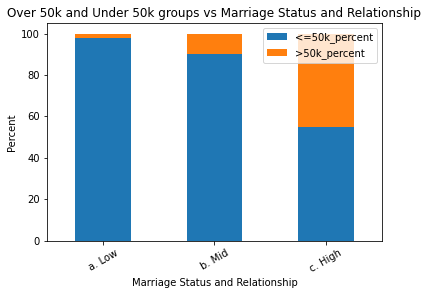

In [324]:
e5.plot(kind="bar", stacked=True)
plt.title('Over 50k and Under 50k groups vs Marriage Status and Relationship')
plt.xlabel('Marriage Status and Relationship')
plt.ylabel('Percent')
plt.xticks(rotation =30)
plt.legend(loc='best')
plt.show()

In [325]:
a6 = census_df[census_df.y ==1].groupby('occupation_bin')[['y']].count()
a6.reset_index(inplace=True)
b6 = census_df[census_df.y ==0].groupby('occupation_bin')[['y']].count()
b6.reset_index(inplace=True)
c6= census_df.groupby('occupation_bin')[['y']].count()
c6.reset_index(inplace=True)
d6 = pd.merge(a6,b6,on='occupation_bin',how='left')
e6 = pd.merge(d6,c6,on='occupation_bin',how='left')
e6.rename(columns={'y_x': '>50k', 'y_y': '<=50k', 'y': 'total'}, inplace = True)
e6['>50k_percent'] = (e6['>50k']/e6.total)*100
e6['<=50k_percent'] = (e6['<=50k']/e6.total)*100
e6 = e6.round(0)
e6=e6[['occupation_bin','<=50k_percent','>50k_percent']]
e6.set_index('occupation_bin', inplace = True)

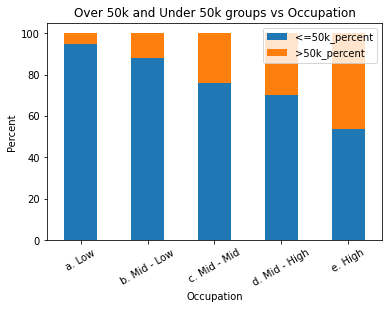

In [326]:
e6.plot(kind="bar", stacked=True)
plt.title('Over 50k and Under 50k groups vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Percent')
plt.xticks(rotation =30)
plt.legend(loc='best')
plt.show()

In [327]:
a7 = census_df[census_df.y ==1].groupby('race_sex_bin')[['y']].count()
a7.reset_index(inplace=True)
b7 = census_df[census_df.y ==0].groupby('race_sex_bin')[['y']].count()
b7.reset_index(inplace=True)
c7= census_df.groupby('race_sex_bin')[['y']].count()
c7.reset_index(inplace=True)
d7 = pd.merge(a7,b7,on='race_sex_bin',how='left')
e7 = pd.merge(d7,c7,on='race_sex_bin',how='left')
e7.rename(columns={'y_x': '>50k', 'y_y': '<=50k', 'y': 'total'}, inplace = True)
e7['>50k_percent'] = (e7['>50k']/e7.total)*100
e7['<=50k_percent'] = (e7['<=50k']/e7.total)*100
e7 = e7.round(0)
e7=e7[['race_sex_bin','<=50k_percent','>50k_percent']]
e7.set_index('race_sex_bin', inplace = True)

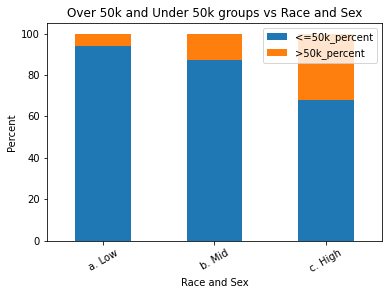

In [328]:
e7.plot(kind="bar", stacked=True)
plt.title('Over 50k and Under 50k groups vs Race and Sex')
plt.xlabel('Race and Sex')
plt.ylabel('Percent')
plt.xticks(rotation =30)
plt.legend(loc='best')
plt.show()

4. Build Decision Tree Classifier Models

In [329]:
labelencoder_X = LabelEncoder()

df = census_df.apply(LabelEncoder().fit_transform)

In [330]:
x_train = df[df.flag == 1].drop(['y','flag'], axis =1)

In [331]:
y_train = df[df.flag == 1][['y']]

In [332]:
x_test = df[df.flag ==  0].drop(['y','flag'], axis =1)

In [333]:
y_test = df[df.flag ==  0][['y']]

In [334]:
from sklearn.tree import DecisionTreeClassifier
detree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf = 15)
detree.fit(x_train, y_train)
y_pred=detree.predict(x_test)

5. Visualize Your Decision Tree using GraphViz

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.757916 to fit



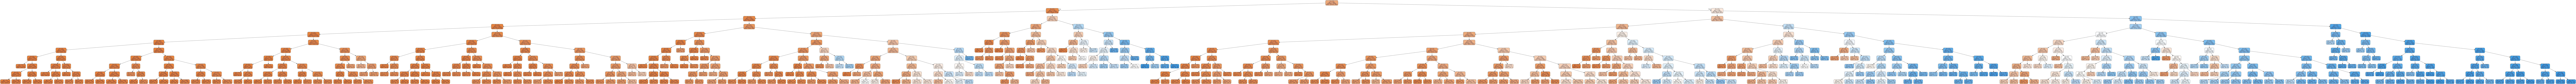

In [335]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(detree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

6. Evaluate Decision Tree Performance

In [336]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11607   828]
 [ 1715  2131]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.72      0.55      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.80      0.74      0.76     16281
weighted avg       0.84      0.84      0.84     16281



In [337]:
score = accuracy_score(y_test, y_pred)
score

0.8438056630428107

In [338]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc(fpr, tpr)

0.7437479573971861

Text(0.5, 1.0, 'ROC curve')

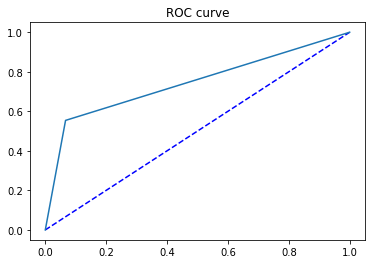

In [339]:
plt.plot([0, 1], [0, 1],'b--')
plt.plot(fpr, tpr)
plt.title('ROC curve')

7. Tune Decision Tree Performance

In [340]:
#Test #1
detree = DecisionTreeClassifier(criterion= 'entropy', min_samples_split =50, min_samples_leaf = 100, max_depth=10)
detree.fit(x_train, y_train)
y_pred=detree.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print('recall_score :', recall_score(y_test, y_pred))
print('precision score:', precision_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, y_pred))


confusion matrix: [[11587   848]
 [ 1751  2095]]
recall_score : 0.5447217888715549
precision score: 0.7118586476384642
f1_score: 0.6171748416556194
accuracy_score: 0.840366070880167


In [341]:
#Test #2
detree = DecisionTreeClassifier(criterion= 'entropy', min_samples_split =50, min_samples_leaf = 100, max_depth=5)
detree.fit(x_train, y_train)
y_pred=detree.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print('recall_score :', recall_score(y_test, y_pred))
print('precision score:', precision_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, y_pred))

confusion matrix: [[11750   685]
 [ 1981  1865]]
recall_score : 0.48491939677587104
precision score: 0.7313725490196078
f1_score: 0.58317698561601
accuracy_score: 0.8362508445427185


In [342]:
#Test #3
detree = DecisionTreeClassifier(criterion= 'entropy', min_samples_split =200, min_samples_leaf = 50, max_depth=10)
detree.fit(x_train, y_train)
y_pred=detree.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print('recall_score :', recall_score(y_test, y_pred))
print('precision score:', precision_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, y_pred))

confusion matrix: [[11581   854]
 [ 1665  2181]]
recall_score : 0.5670826833073322
precision score: 0.7186161449752883
f1_score: 0.6339194884464466
accuracy_score: 0.8452797739696579


In [343]:
#Test #4
detree = DecisionTreeClassifier(criterion= 'entropy', min_samples_split =100, min_samples_leaf = 100, max_depth=10)
detree.fit(x_train, y_train)
y_pred=detree.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print('recall_score :', recall_score(y_test, y_pred))
print('precision score:', precision_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, y_pred))

confusion matrix: [[11587   848]
 [ 1751  2095]]
recall_score : 0.5447217888715549
precision score: 0.7118586476384642
f1_score: 0.6171748416556194
accuracy_score: 0.840366070880167


In [344]:
#Test #5
detree = DecisionTreeClassifier(criterion= 'gini', min_samples_split =50, min_samples_leaf = 100, max_depth=10)
detree.fit(x_train, y_train)
y_pred=detree.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print('recall_score :', recall_score(y_test, y_pred))
print('precision score:', precision_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, y_pred))

confusion matrix: [[11570   865]
 [ 1745  2101]]
recall_score : 0.5462818512740509
precision score: 0.7083614295347269
f1_score: 0.6168526130358192
accuracy_score: 0.839690436705362


In [345]:
#Test #6
detree = DecisionTreeClassifier(criterion= 'gini', min_samples_split =50, min_samples_leaf = 100, max_depth=5)
detree.fit(x_train, y_train)
y_pred=detree.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print('recall_score :', recall_score(y_test, y_pred))
print('precision score:', precision_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, y_pred))

confusion matrix: [[11478   957]
 [ 1667  2179]]
recall_score : 0.5665626625065002
precision score: 0.6948341836734694
f1_score: 0.6241764537381839
accuracy_score: 0.8388305386647011


In [346]:
#Test #7
detree = DecisionTreeClassifier(criterion= 'gini', min_samples_split =50, min_samples_leaf = 200, max_depth=10)
detree.fit(x_train, y_train)
y_pred=detree.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print('recall_score :', recall_score(y_test, y_pred))
print('precision score:', precision_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, y_pred))

confusion matrix: [[11376  1059]
 [ 1558  2288]]
recall_score : 0.5949037961518461
precision score: 0.6835972512697939
f1_score: 0.6361740581120535
accuracy_score: 0.8392604876850316


In [347]:
#Test #8
detree = DecisionTreeClassifier(criterion= 'gini', min_samples_split =100, min_samples_leaf = 100, max_depth=10)
detree.fit(x_train, y_train)
y_pred=detree.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test, y_pred))
print('recall_score :', recall_score(y_test, y_pred))
print('precision score:', precision_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, y_pred))

confusion matrix: [[11570   865]
 [ 1745  2101]]
recall_score : 0.5462818512740509
precision score: 0.7083614295347269
f1_score: 0.6168526130358192
accuracy_score: 0.839690436705362


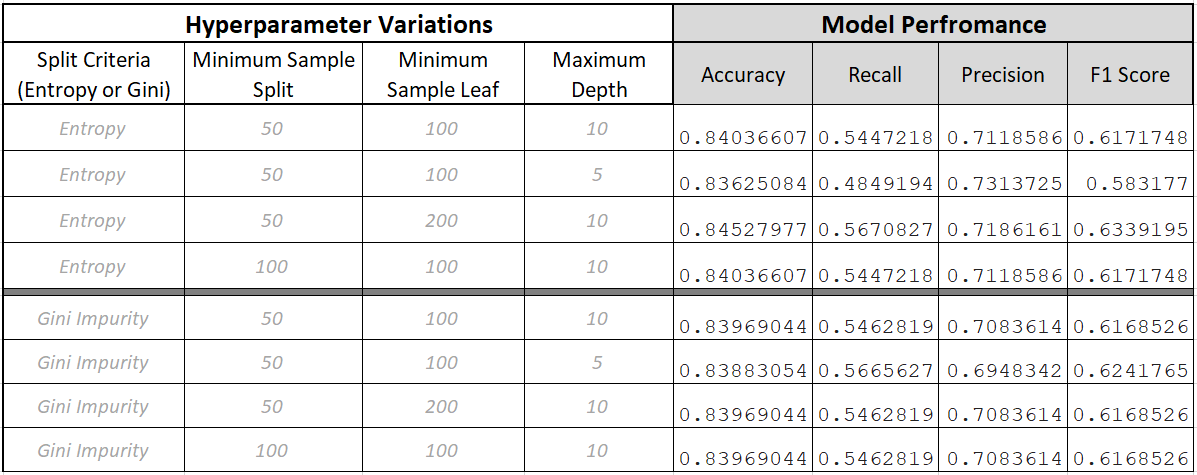

8. Conclusion

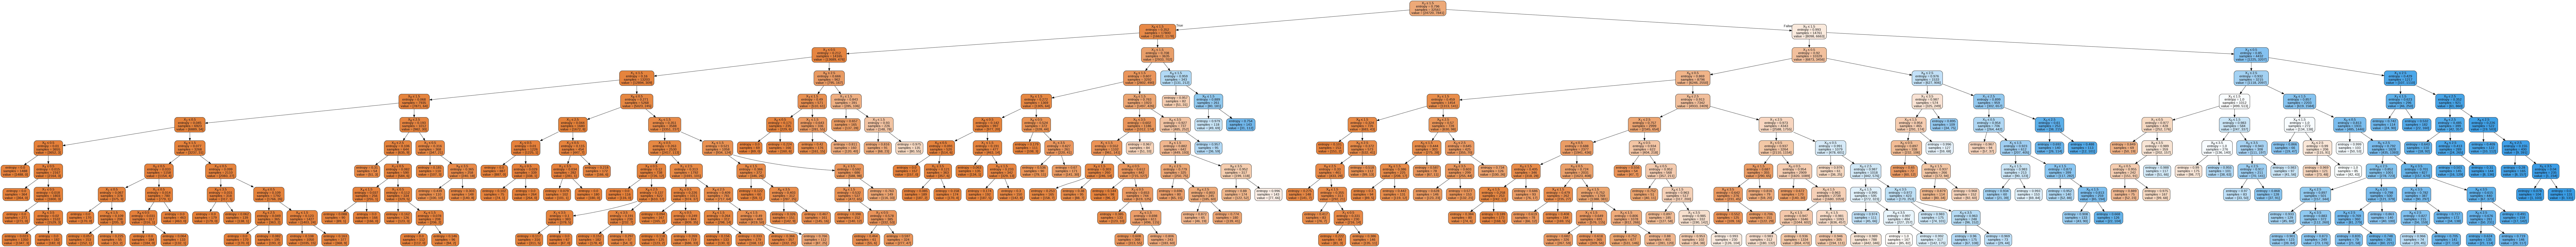

In [348]:
best_detree = DecisionTreeClassifier(criterion= 'entropy', min_samples_split =200, min_samples_leaf = 50, max_depth=10)
best_detree.fit(x_train, y_train)
y_pred=best_detree.predict(x_test)
dot_data = StringIO()
export_graphviz(best_detree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Conclusion

In [349]:
#Best model Time
%time
best_detree = DecisionTreeClassifier(criterion= 'entropy', min_samples_split =200, min_samples_leaf = 50, max_depth=10)
best_detree.fit(x_train, y_train)
y_pred=best_detree.predict(x_test)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs


9. Automation of Performance Tuning

In [350]:
def decision_models (a,b,c,d):
  tree_model = DecisionTreeClassifier(criterion= a, min_samples_split =b, min_samples_leaf = c, max_depth=d)
  tree_model.fit(x_train, y_train)
  y_pred=tree_model.predict(x_test)
  data = [{'Critiria': a,
         'Minimum Sample Slit' : b,
         'Minimum Sample Leaf' : c,
         'Maximum Depth' : d,
         'Recall': recall_score(y_test, y_pred), 
         'Precision': precision_score(y_test, y_pred), 
         'F1 Score' : f1_score(y_test, y_pred), 
         'Accuracy': accuracy_score(y_test, y_pred)}]
  df = pd.DataFrame(data)
  return df

In [351]:
automate_test1 = decision_models('entropy', 50, 100, 10)
automate_test2 = decision_models('entropy', 50, 100, 5)
automate_test3 = decision_models('entropy', 50, 200, 10)
automate_test4 = decision_models('entropy', 100, 100, 10)
automate_test5 = decision_models('gini', 50, 100, 10)
automate_test6 = decision_models('gini', 50, 100, 5)
automate_test7 = decision_models('gini', 50, 200, 10)
automate_test8 = decision_models('gini', 100, 100, 10)
automate_table = pd.concat([automate_test1,automate_test2,automate_test3,automate_test4,automate_test5,automate_test6,automate_test7,automate_test8],ignore_index=True)
automate_table

Critiria  Minimum Sample Slit  ...  F1 Score  Accuracy
0  entropy                   50  ...  0.617175  0.840366
1  entropy                   50  ...  0.583177  0.836251
2  entropy                   50  ...  0.636783  0.840243
3  entropy                  100  ...  0.617175  0.840366
4     gini                   50  ...  0.616853  0.839690
5     gini                   50  ...  0.624176  0.838831
6     gini                   50  ...  0.636174  0.839260
7     gini                  100  ...  0.616853  0.839690

[8 rows x 8 columns]

10. Prediction using your “trained” Decision Tree Model

In [352]:
value_test = [3, 1, 2, 2, 1, 1, 4, 1, 3]
value_test = np.array(value_test).reshape(1, -1)
y_pred1 = best_detree.predict(value_test)
y_pred1

array([1])